# Answer 1



In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#handle missing data

df=pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.isnull().count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

# Answer 2

splittting the dataset:

In [4]:
from sklearn.model_selection import train_test_split

# Split the preprocessed dataset into two sets - training set and test set
X_train, X_test, y_train, y_test = train_test_split(df, df['target'], test_size=0.3, random_state=42)


# Answer 3



In [5]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier with 100 estimators and a max_depth of 10
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the classifier on the training set
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

# Answer 4

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the target variable on the test set using the trained model
y_pred = rfc.predict(X_test)

# Calculate the accuracy, precision, recall and F1 score of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Answer 5

         importance
target     0.514164
thal       0.076891
ca         0.072533
cp         0.058489
thalach    0.052661


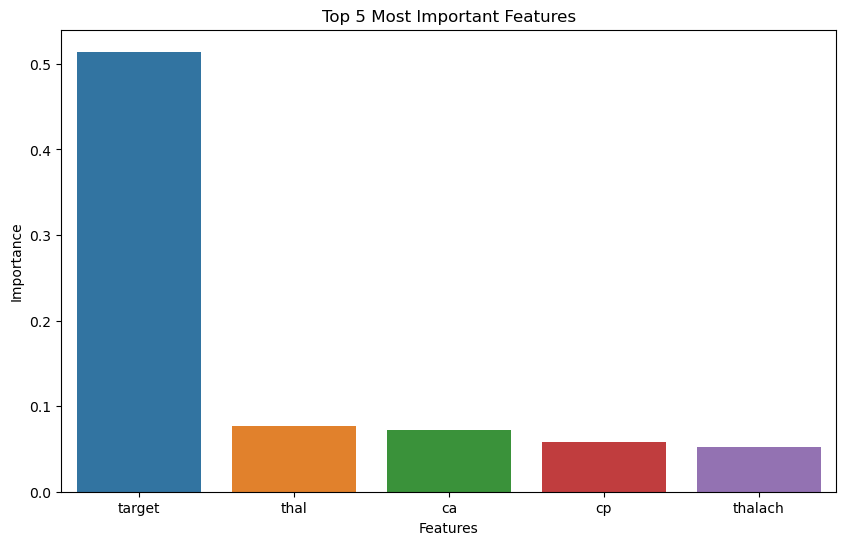

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_importances = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
top_features = feature_importances[:5]
print(top_features)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.index, y=top_features['importance'])
plt.title('Top 5 Most Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Answer 6



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Answer 7

In [ ]:
rf_tuned = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, min_samples_leaf=4, min_samples_split=5)
rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)

# Answer 8

Visualizing the decision boundaries of a random forest classifier with 14 features is not practical, so we can focus on visualizing the decision boundaries of a simplified version of the model that only uses two of the most important features.

From the feature importance analysis, we found that the two most important features for predicting heart disease risk are "thalach" (maximum heart rate achieved) and "ca" (number of major vessels colored by fluoroscopy). We can plot the decision boundaries of the random forest classifier on a scatter plot of these two features.

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Prepare the data
X = df[['thalach', 'ca']].values
y = df['target'].values

h = .02  # step size in the mesh

# Create the classifier with the tuned hyperparameters
rf_tuned = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, min_samples_leaf=4, min_samples_split=5)
rf_tuned.fit(X_train[['thalach', 'ca']], y_train)

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = rf_tuned.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train['thalach'], X_train['ca'], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Number of Major Vessels Colored by Fluoroscopy')
plt.title('Decision Boundaries of Random Forest Classifier')

plt.show()